In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
#!pip install unrar
%cd /content/drive/MyDrive/myntradataset
!unrar x /content/drive/MyDrive/myntradataset/images.rar 

In [4]:
DATASET_PATH = "/content/drive/MyDrive/myntradataset/"
print(os.listdir(DATASET_PATH))

['images.rar', 'styles.csv', 'visual_product_recommend.h5', 'model2.h5', 'alexnet.h5', 'images']


In [5]:
data_path = "/content/drive/MyDrive/myntradataset/images/"
print(len(os.listdir(data_path)))

41906


['images.rar', 'styles.csv', 'visual_product_recommend.h5', 'model2.h5', 'alexnet.h5', 'images']
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg


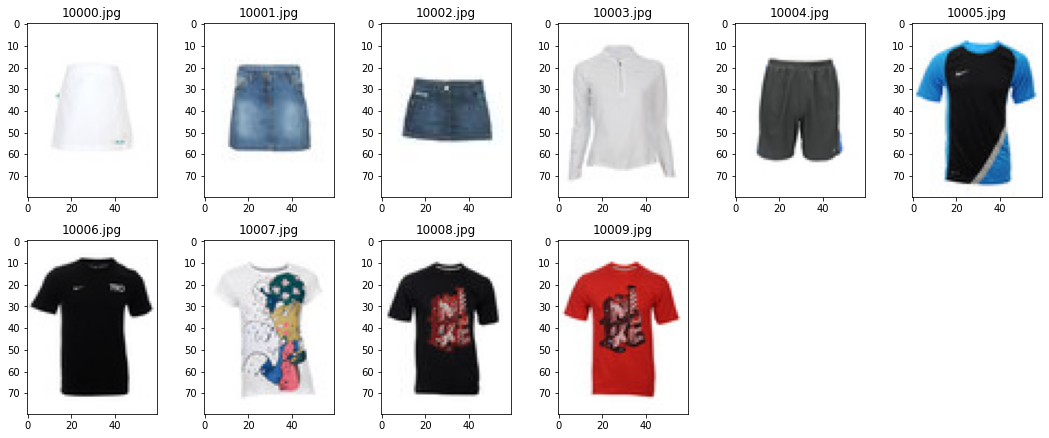

In [6]:
# what is inside the main directory
list_directory = os.listdir(DATASET_PATH)
print(list_directory)

# each time directory files gets reordered. That's why needed to find where images folder is.
index=0
for i in range (len(list_directory)):
    if list_directory[i]=="images":
        index=i
        break

# what is in the image directory
imageIndex = os.listdir(DATASET_PATH+list_directory[index])
# print(type(imageIndex))
head = 10

# collecting some samples in list
sampleImages = []

# showing indices
for i in range (head):
    sampleImages.append(imageIndex[i])
    print(sampleImages[i])

# choosing some samples to observe
fig=plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
axis=[]
row = len(sampleImages)/2
col = row+1

for i in range (len(sampleImages)):
    Image_path=DATASET_PATH+list_directory[index]+"/"+sampleImages[i]
    src = cv2.imread(Image_path)
    image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB) 
    axis.append(fig.add_subplot(row, col, i+1))
    subplot_title=sampleImages[i]
    axis[-1].set_title(subplot_title)  
    plt.imshow(image)

fig.tight_layout()
plt.show()

In [7]:
df = pd.read_csv(DATASET_PATH + "styles.csv", nrows=50000, error_bad_lines=False)
df.drop(df.columns[0], axis=1, inplace=True)
df.head(10)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt,1855.jpg
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt,30805.jpg
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt,26960.jpg
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks,29114.jpg
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch,30039.jpg


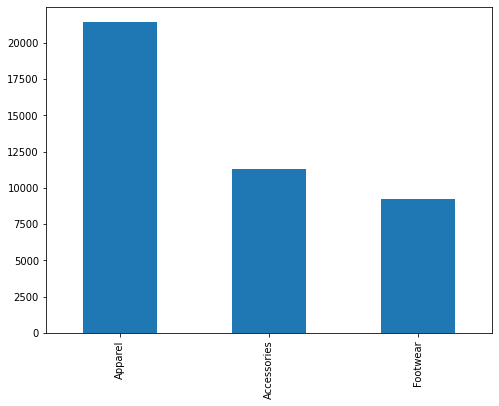

In [8]:
plt.figure(figsize=(8,6))
df['masterCategory'].value_counts().plot(kind='bar',x='type',y='filename')
plt.show()

In [9]:
from keras.preprocessing.image import ImageDataGenerator

#image generator object from keras. reference : Keras Docs
image_generator = ImageDataGenerator(
    validation_split=0.2, rescale=1/255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True
)

#create a flow of images for training the model.
training_generator = image_generator.flow_from_dataframe(
    dataframe = df,
    directory= "/content/drive/MyDrive/myntradataset/images/",
    x_col="image",
    y_col="masterCategory",
    target_size=(227,227),
    batch_size=32,
    subset="training"

)

#create a flow of images for validating(testing) the trained model.
validation_generator = image_generator.flow_from_dataframe(
    dataframe = df,
    directory="/content/drive/MyDrive/myntradataset/images/",
    x_col="image",
    y_col="masterCategory",
    target_size=(227,227),
    batch_size=32,
    subset="validation"
)


Found 33525 validated image filenames belonging to 3 classes.
Found 8381 validated image filenames belonging to 3 classes.


In [11]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Model,Sequential

In [ ]:
image_size=[227,227]
model=VGG16(input_shape=image_size+[3],include_top=False,weights="imagenet")
## We are going To use imagenet Weights

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layers in model.layers:
  layers.trainable=False

In [ ]:
final_model=Model(inputs=model.input,outputs=Dense(3,activation="softmax")(Flatten()(model.output)))
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
final_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

In [ ]:
vgg16=final_model.fit(training_generator,epochs=50,steps_per_epoch=20,validation_data=validation_generator)

Epoch 1/50
20/20 [==============================] - 138s 7s/step - loss: 0.3686 - accuracy: 0.7578 - val_loss: 0.1747 - val_accuracy: 0.9236
Epoch 2/50
20/20 [==============================] - 124s 7s/step - loss: 0.1366 - accuracy: 0.9375 - val_loss: 0.1063 - val_accuracy: 0.9554
Epoch 3/50
20/20 [==============================] - 125s 7s/step - loss: 0.0837 - accuracy: 0.9719 - val_loss: 0.1069 - val_accuracy: 0.9437
Epoch 4/50
20/20 [==============================] - 124s 7s/step - loss: 0.0583 - accuracy: 0.9797 - val_loss: 0.0746 - val_accuracy: 0.9704
Epoch 5/50
20/20 [==============================] - 127s 7s/step - loss: 0.0637 - accuracy: 0.9746 - val_loss: 0.0679 - val_accuracy: 0.9748
Epoch 6/50
20/20 [==============================] - 126s 7s/step - loss: 0.0567 - accuracy: 0.9750 - val_loss: 0.0613 - val_accuracy: 0.9765
Epoch 7/50
20/20 [==============================] - 124s 6s/step - loss: 0.0578 - accuracy: 0.9766 - val_loss: 0.0774 - val_accuracy: 0.9693
Epoch 8/50
20

Text(0.5, 1.0, 'Accuracy evolution')

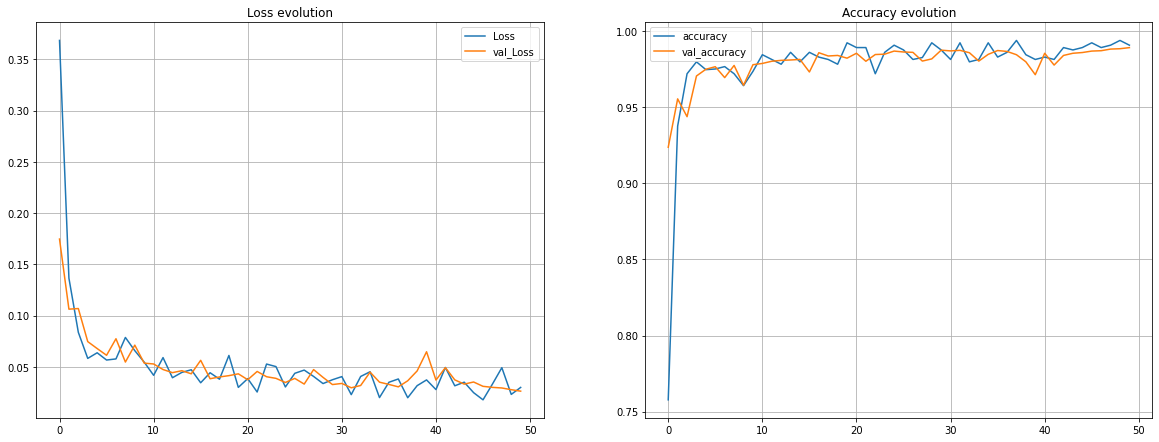

In [ ]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
plt.plot(vgg16.history['loss'], label='Loss')
plt.plot(vgg16.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(vgg16.history['accuracy'], label='accuracy')
plt.plot(vgg16.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [ ]:
final_model.save('VGG16tc.h5')

In [ ]:
from keras import models
final_model = models.load_model('VGG16tc.h5')

In [19]:
#X_test, y_test = next(validation_generator)
#print(len(X_test))
batch_size = 32
#!pip install tqdm
import tqdm
validation_generator.reset()
X_test, y_test = next(validation_generator)
for i in tqdm.tqdm(range(int(validation_generator.n/batch_size)-200)): 
  img, label = next(validation_generator)
  X_test = np.append(X_test, img, axis=0 )
  y_test = np.append(y_test, label, axis=0)
#print(X_test.shape, y_test.shape)

100%|██████████| 61/61 [00:52<00:00,  1.16it/s]


In [ ]:
y_predict = final_model.predict(X_test)
predicted_classes = np.argmax(y_predict,axis=1)

62/62 [==============================] - 8s 125ms/step


In [ ]:
score = final_model.evaluate(X_test, y_test,verbose=0)
print(score)

[0.023411041125655174, 0.9879032373428345]


In [22]:
y_test = np.argmax(y_test, axis = 1)

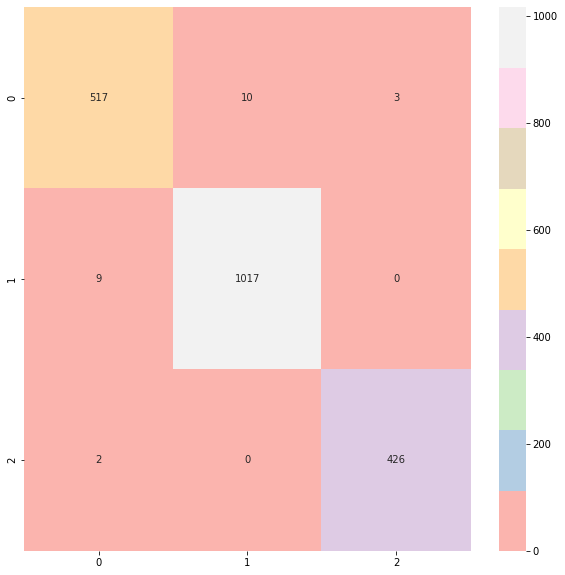

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, cmap = 'Pastel1', fmt='g')

In [ ]:
cm_df = pd.DataFrame(cm)
cm_df.columns = [ 'Predicted Accessories','Predicted Apparel', 'Predicted Footwear']
cm_final_df = cm_df.rename(index={0: 'Actually Accessories', 1: 'Actually Apparel', 2: 'Actually Footwear'})
cm_final_df

,Predicted Accessories,Predicted Apparel,Predicted Footwear
Actually Accessories,517,10,3
Actually Apparel,9,1017,0
Actually Footwear,2,0,426


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Precision = precision_score(y_test, predicted_classes,average='macro')
Recall = recall_score(y_test, predicted_classes,average='macro')
F1_score = f1_score(y_test, predicted_classes, average='macro')

In [ ]:
df_metrix = pd.DataFrame(data = [(Precision, Recall, F1_score)], columns = ['Precision', 'Recall', 'F1_score'])
df_metrix

,Precision,Recall,F1_score
0,0.987479,0.987342,0.987409


## VGG19

In [12]:
image_size=[227,227]
model1=VGG19(input_shape=image_size+[3],include_top=False,weights="imagenet")

80134624/80134624 [==============================] - 3s 0us/step


In [13]:
for layers in model1.layers:
  layers.trainable=False

final_model1=Model(inputs=model1.input,outputs=Dense(3,activation="softmax")(Flatten()(model1.output)))
final_model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 227, 227, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 227, 227, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 113, 113, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 113, 113, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 113, 113, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
final_model1.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
vgg19=final_model1.fit(training_generator,epochs=50,steps_per_epoch=20,validation_data=validation_generator)

Epoch 1/50
20/20 [==============================] - 138s 7s/step - loss: 0.3008 - accuracy: 0.8203 - val_loss: 0.1443 - val_accuracy: 0.9251
Epoch 2/50
20/20 [==============================] - 127s 7s/step - loss: 0.1090 - accuracy: 0.9484 - val_loss: 0.0957 - val_accuracy: 0.9570
Epoch 3/50
20/20 [==============================] - 152s 8s/step - loss: 0.0841 - accuracy: 0.9656 - val_loss: 0.0806 - val_accuracy: 0.9668
Epoch 4/50
20/20 [==============================] - 125s 7s/step - loss: 0.0823 - accuracy: 0.9672 - val_loss: 0.0807 - val_accuracy: 0.9630
Epoch 5/50
20/20 [==============================] - 124s 6s/step - loss: 0.0576 - accuracy: 0.9781 - val_loss: 0.0817 - val_accuracy: 0.9642
Epoch 6/50
20/20 [==============================] - 151s 8s/step - loss: 0.0719 - accuracy: 0.9719 - val_loss: 0.0915 - val_accuracy: 0.9535
Epoch 7/50
20/20 [==============================] - 124s 6s/step - loss: 0.0654 - accuracy: 0.9688 - val_loss: 0.0663 - val_accuracy: 0.9720
Epoch 8/50
20

Text(0.5, 1.0, 'Accuracy evolution')

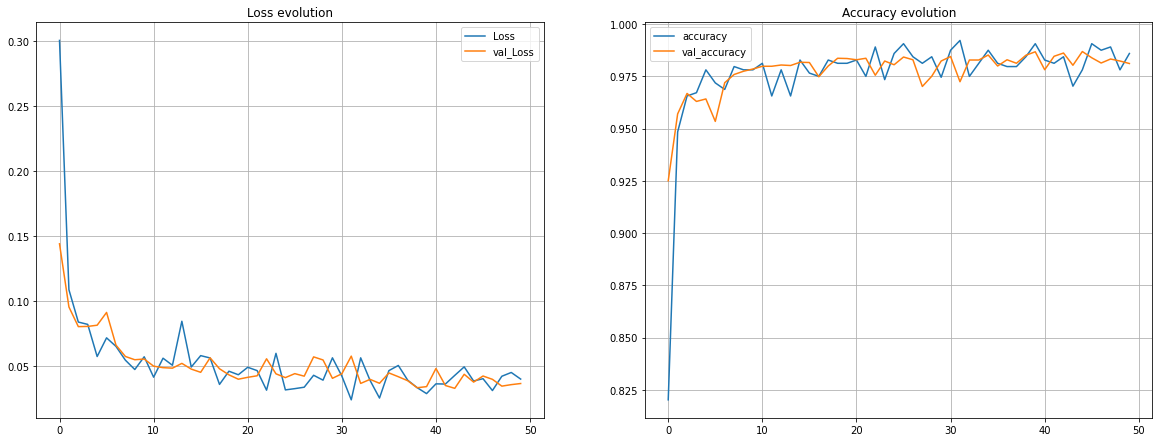

In [15]:
plt.figure(figsize=(20, 16))

plt.subplot(2, 2, 1)
plt.plot(vgg19.history['loss'], label='Loss')
plt.plot(vgg19.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(vgg19.history['accuracy'], label='accuracy')
plt.plot(vgg19.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [16]:
final_model1.save('VGG19tc.h5')

In [17]:
from keras import models
final_model1 = models.load_model('VGG19tc.h5')

In [20]:
y_predict1 = final_model1.predict(X_test)
predicted_classes1 = np.argmax(y_predict1,axis=1)
#y_test = np.argmax(y_test, axis = 1)

62/62 [==============================] - 9s 150ms/step


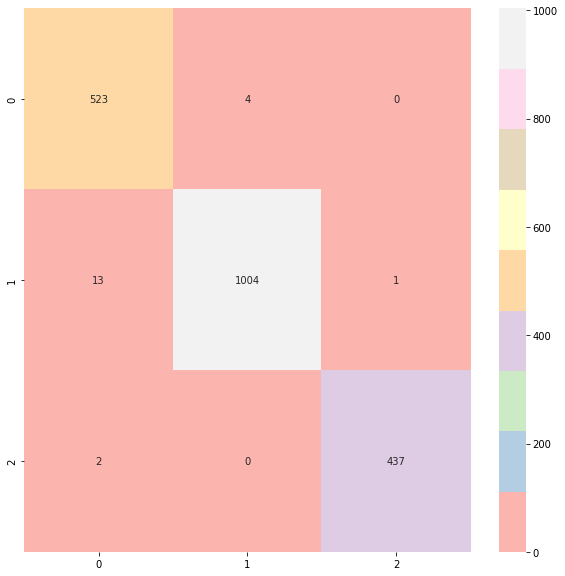

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, predicted_classes1)
plt.figure(figsize = (10,10))
sns.heatmap(cm1, annot=True, cmap = 'Pastel1', fmt = 'g')

In [24]:
cm_df1 = pd.DataFrame(cm1)
cm_df1.columns = [ 'Predicted Accessories','Predicted Apparel', 'Predicted Footwear']
cm_final_df1 = cm_df1.rename(index={0: 'Actually Accessories', 1: 'Actually Apparel', 2: 'Actually Footwear'})
cm_final_df1

,Predicted Accessories,Predicted Apparel,Predicted Footwear
Actually Accessories,523,4,0
Actually Apparel,13,1004,1
Actually Footwear,2,0,437


In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Precision1 = precision_score(y_test, predicted_classes1,average= 'macro')
Recall1 = recall_score(y_test, predicted_classes1,average='macro')
F1_score1 = f1_score(y_test, predicted_classes1, average='macro')

df_metrix1 = pd.DataFrame(data = [(Precision1, Recall1, F1_score1)], columns = ['Precision', 'Recall', 'F1_score'])
df_metrix1

,Precision,Recall,F1_score
0,0.988623,0.991367,0.989951
